# Inference: Adaptive Covariance MCMC

This example shows you how to perform Bayesian inference on a time series, using [Adaptive Covariance MCMC](http://pints.readthedocs.io/en/latest/mcmc_samplers/adaptive_covariance_mcmc.html).

It follows on from the [first sampling example](./sampling-first-example.ipynb).

Running...
Done!
R-hat:
[1.0001675273693107, 1.000730731731708, 1.0010628482441937]


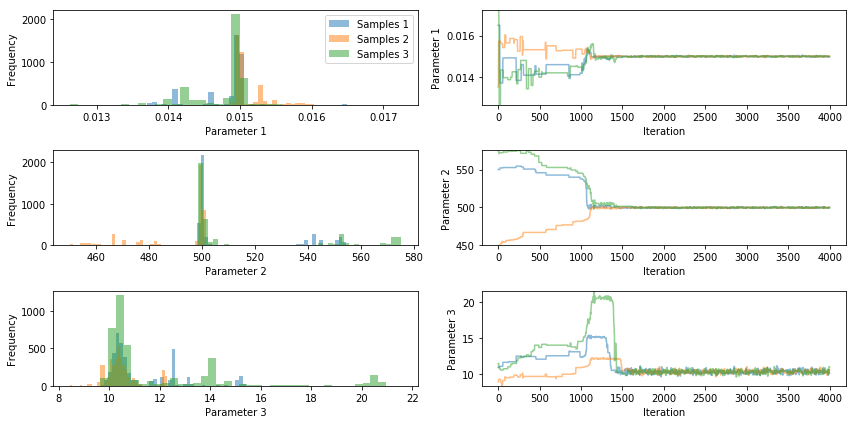

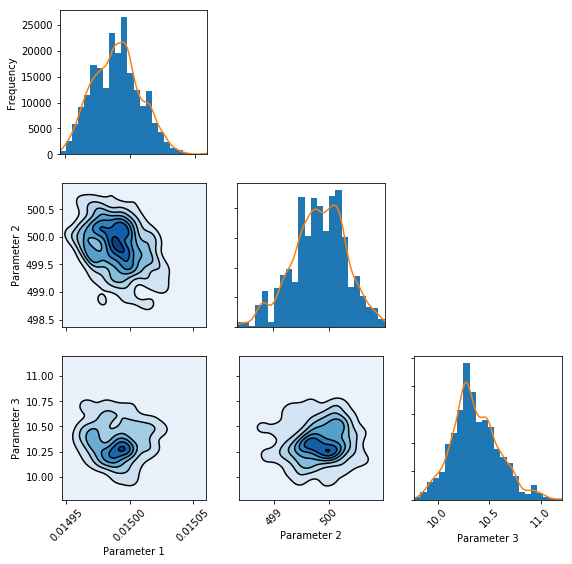

In [1]:
import os
os.chdir('C:/Users/bclamber/Desktop/AllPints/pints4/pints')
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Choose starting points for 3 mcmc chains
xs = [
    real_parameters * 1.1,
    real_parameters * 0.9,
    real_parameters * 1.15,
]

# Create mcmc routine
mcmc = pints.MCMCSampling(log_posterior, 3, xs, method=pints.DramMCMC)

# Add stopping criterion
mcmc.set_max_iterations(4000)

# Start adapting after 1000 iterations
mcmc.set_initial_phase_iterations(1000)

# Disable logging mode
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Show traces and histograms
pints.plot.trace(chains)

# Discard warm up
chains = chains[:, 2000:, :]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)

# Show graphs
plt.show()

In [2]:
chains

array([[[  1.49908055e-02,   5.00171854e+02,   1.03260148e+01],
        [  1.49908055e-02,   5.00171854e+02,   1.03260148e+01],
        [  1.49908055e-02,   5.00171854e+02,   1.03260148e+01],
        ..., 
        [  1.49809671e-02,   5.00139572e+02,   1.01537342e+01],
        [  1.49809671e-02,   5.00139572e+02,   1.01537342e+01],
        [  1.49809671e-02,   5.00139572e+02,   1.01537342e+01]],

       [[  1.49730139e-02,   5.00220123e+02,   1.02950082e+01],
        [  1.49730139e-02,   5.00220123e+02,   1.02950082e+01],
        [  1.49730139e-02,   5.00220123e+02,   1.02950082e+01],
        ..., 
        [  1.49880231e-02,   5.00168489e+02,   1.05827416e+01],
        [  1.49871691e-02,   5.00092009e+02,   1.06974801e+01],
        [  1.49871691e-02,   5.00092009e+02,   1.06974801e+01]],

       [[  1.49943174e-02,   4.99941362e+02,   1.04124096e+01],
        [  1.49824998e-02,   4.99342330e+02,   1.06240731e+01],
        [  1.49824998e-02,   4.99342330e+02,   1.06240731e+01],
        

In [3]:
a = np.array([1,2,3])
b = a

In [4]:
a[0] = 2

In [5]:
b

array([2, 2, 3])

In [6]:
float('-Inf')

-inf